In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define parameters of emission
f0 = 77e9  # Radar frequency (Hz)
B = 600e6  # Chirp bandwidth (Hz)
T = 40e-6   # Chirp duration (s)
c = 3e8    # Speed of light (m/s)
slope = B / T

print('Range resolution: ', c / (2 * B), 'm')

# Define parameters of target
velocity = 18 # m/s
ds = np.sqrt((1+velocity/c)/(1-velocity/c)) # Doppler frequency shift (Hz)
print('Doppler frequency shift: ', ds, 'Hz')
# fd = 0
object_distance = 40 # m
delta_t = 2 * object_distance / c # Time delay (s)

Range resolution:  0.25 m
Doppler frequency shift:  1.0000000600000019 Hz


In [3]:
print(2000/40e-6)

49999999.99999999


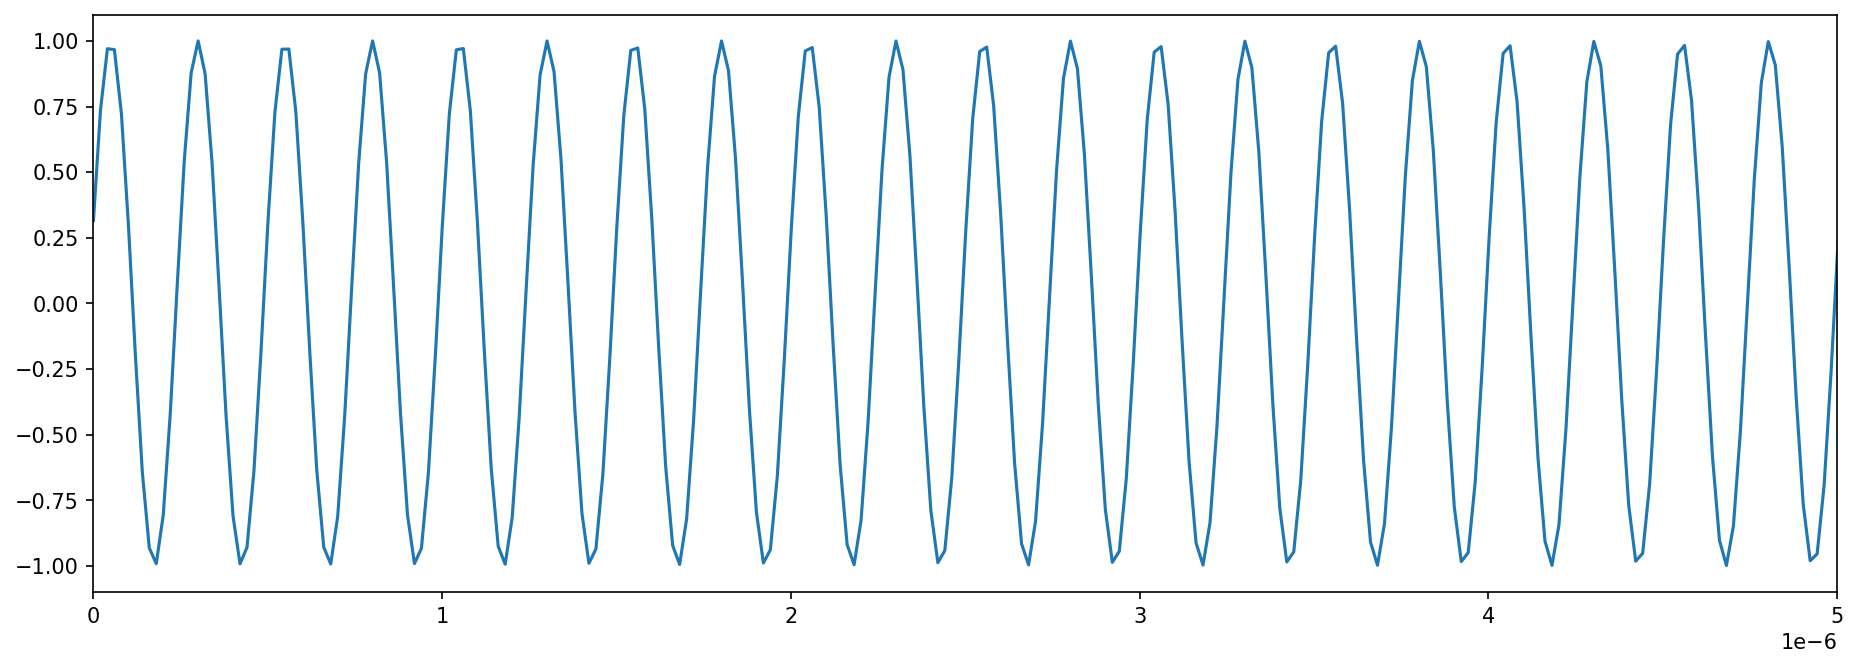

In [4]:
# Generate IF signal
fs = 50e6 # sampling frequency
t = np.linspace(0, T, int(fs*T)) # Time resolution

# IF_signal = np.exp(2j * np.pi * ((f0 * ((ds - 1) * t - ds * delta_t)) - (slope * t * delta_t) + (slope / 2) * delta_t**2))
IF_signal = np.exp(2j * np.pi * (f0 * (t - ds * (t - delta_t)) + slope/2 * delta_t * (2*t - delta_t)))

plt.figure(figsize=(15, 5), dpi=150)
plt.plot(t, np.real(IF_signal))
plt.xlim([0,5e-6])
plt.show()

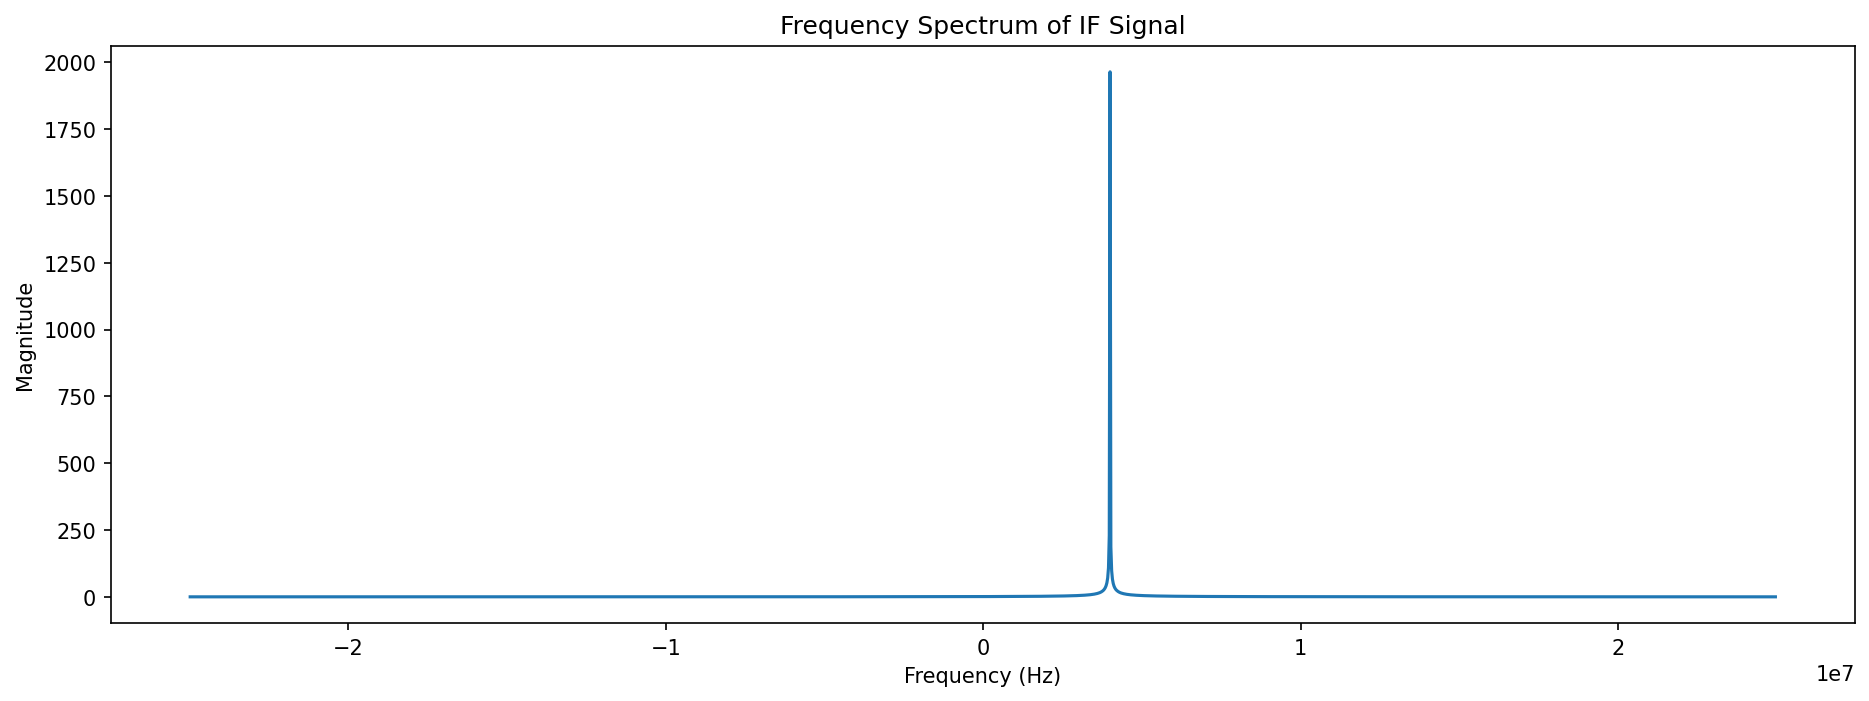

Higher peak: 3998000.0 Hz


In [5]:
# Calculate the frequency of the IF signal
IF_frequency = np.fft.fftfreq(len(t), d=(t[1] - t[0]))
IF_magnitude = np.abs(np.fft.fft(IF_signal))
IF_magnitude = np.fft.fftshift(IF_magnitude)
IF_frequency = np.fft.fftshift(IF_frequency)

# Plot the frequency spectrum
plt.figure(figsize=(15, 5), dpi=150)
plt.plot(IF_frequency, IF_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of IF Signal')
# plt.xlim([-1e6, 1e6])
# plt.xlim(IF_frequency[np.argmax(IF_magnitude)]*0.95, IF_frequency[np.argmax(IF_magnitude)]*1.05)
plt.show()

# print(f'{IF_frequency[np.argmax(IF_magnitude)]:.2e}')
print(f'Higher peak: {IF_frequency[np.argmax(IF_magnitude)]} Hz')

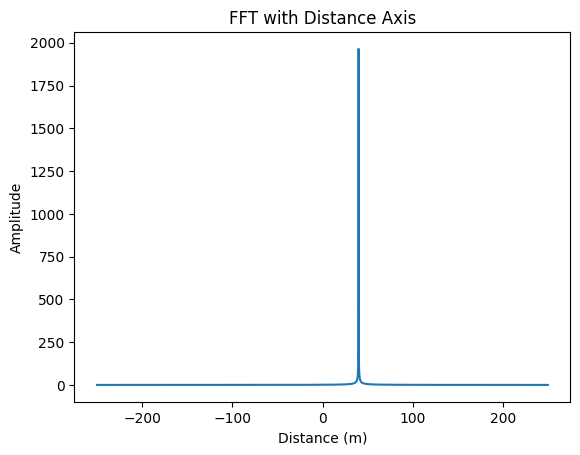

In [6]:
# Convert frequency to distance
distance = (c * IF_frequency * T) / (2 * B)

# Plot the FFT in terms of distance
plt.plot(distance, IF_magnitude)
# plt.xlim([0, 100])
plt.xlabel('Distance (m)')
plt.ylabel('Amplitude')
# plt.xlim([25,35])
# plt.xlim([0, 0.5])
plt.title('FFT with Distance Axis')
plt.show()
